<a href="https://colab.research.google.com/github/GerardoMunoz/robots/blob/main/direct_kinematics_row_vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%reset -f

# Direct Kinematics with Row-Vector Convention

This notebook demonstrates how to build the **direct kinematics transformation matrix** using the row-vector convention (as in Three.js). We will use SymPy for symbolic computation.

## Robot structure:
- Rotation about Y (θ0)
- Translation along Y (a0)
- Rotation about Z (θ1)
- Translation along X (a1)
- Rotation about Z (θ2)
- Translation along X (a2)

The final afin transform is:

\[ T = R_y(θ0) T_y(a0) R_z(θ1) T_x(a1) R_z(θ2) T_x(a2) \]

We will construct and simplify this step by step.

In [38]:
import sympy as sp



# === Helper transforms in ROW-VECTOR convention ===

def R_y(α):
    return sp.Matrix([
        [sp.cos(α), 0, sp.sin(α), 0],
        [0,             1,  0,             0],
        [-sp.sin(α), 0,  sp.cos(α), 0],
        [0,             0,  0,             1]
    ])

def R_z(α):
    return sp.Matrix([
        [sp.cos(α), sp.sin(α), 0, 0],
        [-sp.sin(α), sp.cos(α), 0, 0],
        [0,              0,             1, 0],
        [0,              0,             0, 1]
    ])

def T_x(a):
    return sp.Matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [a, 0, 0, 1]
    ])

def T_y(a):
    return sp.Matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, a, 0, 1]
    ])

Matrix([[0, 0, 0, 1]])
Matrix([[0.980066577841242, 0, 0.198669330795061, 0], [0, 1, 0, 0], [-0.198669330795061, 0, 0.980066577841242, 0], [0, 1, 0, 1]])
Matrix([[0, 1, 0, 1]])
Matrix([[0.902701096375460, 0.389418342308651, 0.182986571299987, 0], [-0.381655902095048, 0.921060994002885, -0.0773654814657817, 0], [-0.198669330795061, 0, 0.980066577841242, 0], [0.902701096375460, 1.38941834230865, 0.182986571299987, 1]])
Matrix([[0.902701096375460, 1.38941834230865, 0.182986571299987, 1]])
Matrix([[0.444554398447626, 0.891207360061435, 0.0901156378948548, 0], [-0.873442547522338, 0.453596121425577, -0.177055569823039, 0], [-0.198669330795061, 0, 0.980066577841242, 0], [1.34725549482309, 2.28062570237009, 0.273102209194842, 1]])
Matrix([[1.34725549482309, 2.28062570237009, 0.273102209194842, 1.00000000000000]])


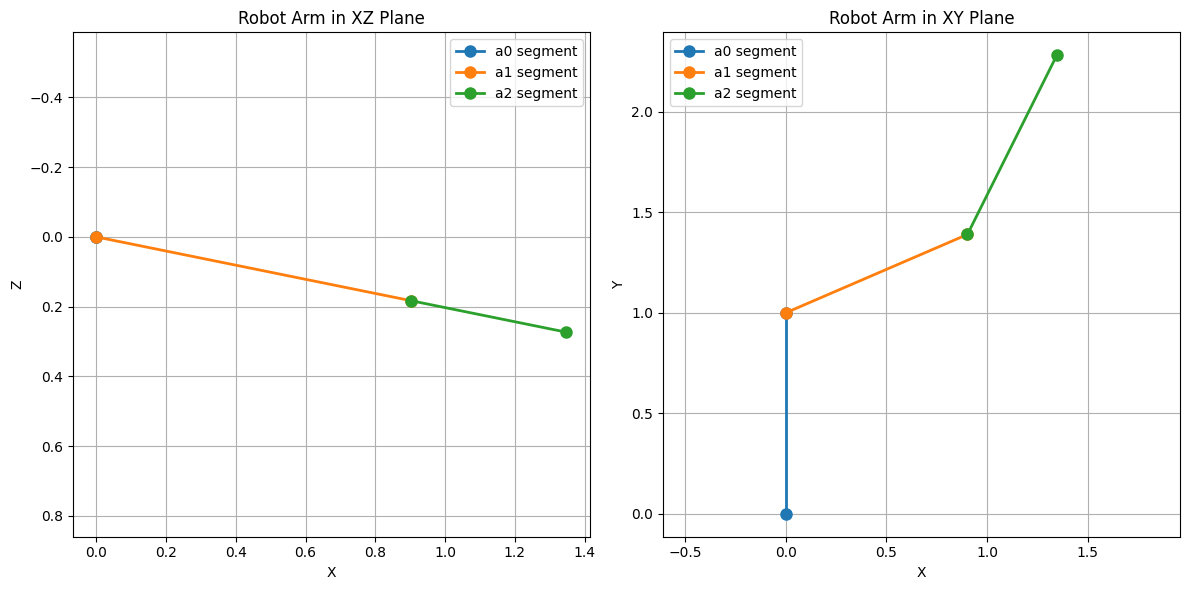

In [43]:
import matplotlib.pyplot as plt

a0, a1, a2 = (1,1,1)#sp.symbols('a0 a1 a2', real=True)

T1 = R_y(0.2)
T2 = T_y(a0)
T3 = R_z(0.4)
T4 = T_x(a1)
T5 = R_z(.7)
T6 = T_x(a2)

origin = sp.Matrix([[0, 0, 0, 1]])
print(origin)
print(T2 @ T1)
joint1_pos_afin = origin @ T2 @ T1
print(joint1_pos_afin)
print(T4 @ T3 @ T2 @ T1)
joint2_pos_afin = origin @ T4 @ T3 @ T2 @ T1
print(joint2_pos_afin)
print(T6 @ T5 @ T4 @ T3 @ T2 @ T1)
end_effector_pos_afin = origin @ T6 @ T5 @ T4 @ T3 @ T2 @ T1
print(end_effector_pos_afin.evalf())


# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Plot in YZ plane (left subplot) ---
axes[0].plot([origin[0], joint1_pos_afin[0]], [origin[2], joint1_pos_afin[2]], 'o-', linewidth=2, markersize=8, label='a0 segment')
axes[0].plot([joint1_pos_afin[0], joint2_pos_afin[0]], [joint1_pos_afin[2], joint2_pos_afin[2]], 'o-', linewidth=2, markersize=8, label='a1 segment')
axes[0].plot([joint2_pos_afin[0], end_effector_pos_afin[0]], [joint2_pos_afin[2], end_effector_pos_afin[2]], 'o-', linewidth=2, markersize=8, label='a2 segment')

axes[0].set_title('Robot Arm in XZ Plane')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Z')
axes[0].grid(True)
axes[0].axis('equal')
axes[0].invert_yaxis()
axes[0].legend()

# --- Plot in XY plane (right subplot) ---
axes[1].plot([origin[0], joint1_pos_afin[0]], [origin[1], joint1_pos_afin[1]], 'o-', linewidth=2, markersize=8, label='a0 segment')
axes[1].plot([joint1_pos_afin[0], joint2_pos_afin[0]], [joint1_pos_afin[1], joint2_pos_afin[1]], 'o-', linewidth=2, markersize=8, label='a1 segment')
axes[1].plot([joint2_pos_afin[0], end_effector_pos_afin[0]], [joint2_pos_afin[1], end_effector_pos_afin[1]], 'o-', linewidth=2, markersize=8, label='a2 segment')


axes[1].set_title('Robot Arm in XY Plane')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True)
axes[1].axis('equal')
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

https://www.geogebra.org/3d/jgmsphuj

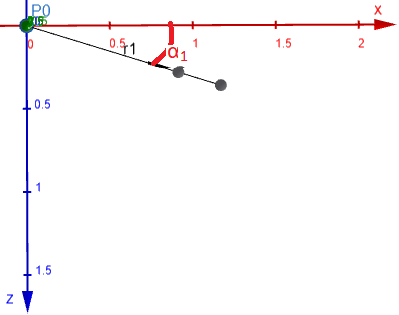

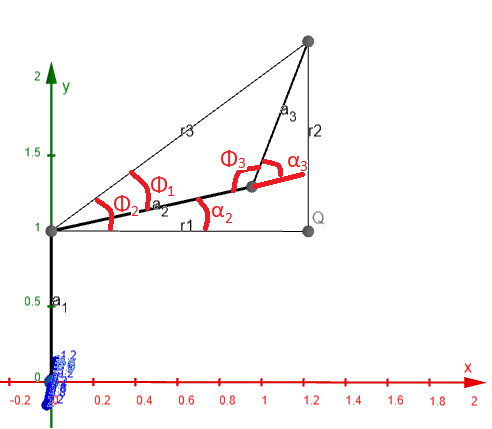

In [44]:
import math
def inv_kin(x03,y03,z03):
    a1,a2,a3 = 1,1,1
    α1 = math.atan2(z03, x03)
    r1 = math.sqrt(x03 ** 2 + z03 ** 2)
    r2 = y03 - a1
    Φ2 = math.atan2(r2, r1)
    r3 = math.sqrt(r1 ** 2 + r2 ** 2)
    Φ1 = math.acos((a3 ** 2 - a2 ** 2 - r3 ** 2) / (-2 * a2 * r3))
    α2 = Φ2 - Φ1
    Φ3 = math.acos((r3 ** 2 - a2 ** 2 - a3 ** 2) / (-2 * a2 * a3))
    α3 = math.pi - Φ3
    return [α1, α2, α3]
inv_kin(1.34725549482309, 2.28062570237009, 0.273102209194842)

[0.19999999999999954, 0.40000000000000885, 0.6999999999999829]